                                            ***Spam Message Detection***

This project focuses on developing a spam message detection system leveraging Google's Gemini-1.5-flash-001 language model. The project's core methodology draws inspiration from a training course on Gemini-1.5-flash, specifically the material covered on day four. This involves adapting and extending the techniques presented in the course to build a robust spam detection model.

The project utilizes a publicly available dataset (License : Apache 2.0) of spam and non-spam (ham) emails sourced from Kaggle (https://www.kaggle.com/datasets/abdallahwagih/spam-emails). This dataset provides the training and testing data necessary for model development and evaluation.

The process involves several key steps:

Data Loading: The project begins by loading the Kaggle the prepared datasets into a suitable Pandas DataFrames format.

Model Training: The core of the project involves fine-tuning the pre-trained Gemini-1.5-flash-001 model on the prepared dataset. The "Message" column likely serves as the input feature, while the "Class" column (spam/ham) provides the labels for supervised learning. The training process involves specifying hyperparameters such as batch size, number of epochs, optimizing these parameters to achieve the best performance.

Model Evaluation: After training, the model's performance is rigorously evaluated using accuracy metric. This typically involves testing the model on a held-out portion of the dataset not used during training. A confusion matrix might be generated to visualize the model's performance across differen

tNote: These descriptions were generated by Google AI Studioment.ronment.

The code  below snippet imports the numpy and pandas libraries for data manipulation and then iterates through all files within the Kaggle input directory, printing the full path of each file. It's a common way to list the contents of the input data in a Kaggle notebook.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/test_spam_msg.csv
/kaggle/input/train_spam_msg.csv


This line installs (or updates) the google-generativeai Python package to version 0.8.3 or later. The -U flag ensures an upgrade, and -q makes the installation quiet (suppresses output). It's used to access Google's generative AI APIs.

In [2]:
%pip install -U -q "google-generativeai>=0.8.3"


Note: you may need to restart the kernel to use updated packages.


This code imports the Google Generative AI library, retrieves a Google API key from Kaggle's secret manager (using kaggle_secrets), and then configures the library to use that key for authentication. This sets up the environment to use Google's generative AI services.

In [3]:
import google.generativeai as genai

from kaggle_secrets import UserSecretsClient

GOOGLE_API_KEY = UserSecretsClient().get_secret("day_4")
genai.configure(api_key=GOOGLE_API_KEY)


This code iterates through the list of available Google Generative AI models and prints the names of those that support the createTunedModel method. It's used to find suitable models for fine-tuning. The second part (re-configuring with the API key) is redundant as it's likely already configured earlier in the code.

In [4]:
for model in genai.list_models():
    if "createTunedModel" in model.supported_generation_methods:
        print(model.name)

models/gemini-1.0-pro-001
models/gemini-1.5-flash-001-tuning


This code reads two CSV files, "train_spam_msg.csv" and "test_spam_msg.csv", from the Kaggle input directory into pandas DataFrames named data_train and data_test respectively. This is a typical first step in machine learning projects to load training and testing datasets.

In [5]:
data_train = pd.read_csv("/kaggle/input/train_spam_msg.csv")
data_test = pd.read_csv("/kaggle/input/test_spam_msg.csv")

This code defines a function sample_data that takes a Pandas DataFrame (df) and a number of samples (num_samples) as input. It then randomly samples num_samples rows from each group (defined by the "Class" column), shuffles the data, and casts the "Class" column to a categorical type. It applies this function to data_train (100 samples) and data_test (30 samples), then prints the size of the resulting dataframes. The final lines are redundant reconfiguration with API key.

In [6]:
def sample_data(df, num_samples):
    df = (
        df.groupby("Class")[df.columns]
        .apply(lambda l: l.sample(num_samples))
        .reset_index(drop=True)
    )

    df["Class"] = df["Class"].astype("category")
    df = df.sample(frac=1)
    return df


df_train = sample_data(data_train, 100)
df_test = sample_data(data_test, 30)
print(df_train.size)
print(df_test.size)

400
120


This code snippet initiates a fine-tuning operation for a Google Gemini model. It generates a random model ID, then uses the create_tuned_model function to fine-tune the "gemini-1.5-flash-001-tuning" model using the df_train DataFrame. The input_key and output_key specify the columns for input text ("Message") and target labels ("Class"). The process runs for 10 epochs with a batch size of 20. The generated model ID is printed. The preceding code, dealing with data sampling, is unrelated to this specific snippet's functionality

In [7]:
from collections.abc import Iterable
import random

model_id = f"spam-detector-{random.randint(10000, 99999)}"

tuning_op = genai.create_tuned_model(
    "models/gemini-1.5-flash-001-tuning",
    training_data=df_train,
    input_key="Message", 
    output_key="Class",
    id=model_id,
    display_name="Spam message detection",
    batch_size=20,
    epoch_count=10,
)
print(model_id)

spam-detector-53617


This code monitors the fine-tuning process of a Google Gemini model until it reaches the "ACTIVE" state. It polls the model's status every 60 seconds using genai.get_tuned_model. Once the model is active, it prints a success message and then plots the training loss curve using Seaborn, based on data extracted from the model's snapshots.

State.CREATING
State.CREATING
State.CREATING
State.CREATING
State.CREATING
State.CREATING
State.CREATING
State.CREATING
State.CREATING
State.CREATING
State.CREATING
Done! The model is ACTIVE


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='step', ylabel='mean_loss'>

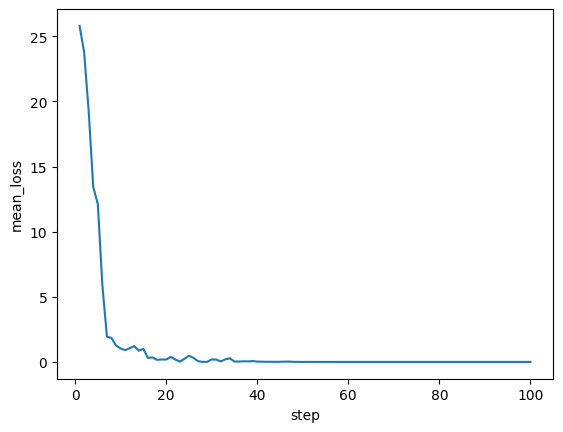

In [8]:
import time
import seaborn as sns

while (tuned_model := genai.get_tuned_model(f"tunedModels/{model_id}")).state.name != 'ACTIVE':

    print(tuned_model.state)
    time.sleep(60)

print(f"Done! The model is {tuned_model.state.name}")

snapshots = pd.DataFrame(tuned_model.tuning_task.snapshots)
sns.lineplot(data=snapshots, x="step", y="mean_loss")

This code defines a function spam_detection that uses a pre-trained model (your_model) to classify input text (message) as either spam or ham. It then applies this function to a DataFrame (df_model_eval), adding a "Prediction" column. Finally, it calculates and prints the accuracy of the model's predictions by comparing the "Prediction" column with the ground truth "Class" column. Error handling is included for cases where model generation doesn't complete successfully.

In [9]:

from google.api_core import retry
from tqdm.rich import tqdm

tqdm.pandas()

retry_policy = {"retry": retry.Retry(predicate=retry.if_transient_error)}


spam_detection_model = genai.GenerativeModel(f"tunedModels/{model_id}")

def spam_detection(message: str) -> str:
    """Classify the provided messages into a spam or ham."""
    response = spam_detection_model.generate_content(message, request_options=retry_policy)
    rc = response.candidates[0]

    if rc.finish_reason.name != "STOP":
        return "(error)"
    else:
        return rc.content.parts[0].text


df_test["Prediction"] = df_test["Message"].progress_apply(spam_detection)

accuracy = (df_test["Class"] == df_test["Prediction"]).sum() / len(df_test)
print(f"Accuracy: {accuracy:.2%}")

Output()

/opt/conda/lib/python3.10/site-packages/tqdm/std.py:885: TqdmExperimentalWarning: rich is experimental/alpha
  t = cls(total=total, **tqdm_kwargs)


Accuracy: 81.67%


In [10]:
df_test

,Class,Message,Prediction
24,ham,Happy new year to u and ur family...may this n...,ham
10,ham,Am on a train back from northampton so i'm afr...,ham
5,ham,Are u coming to the funeral home,ham
3,ham,"Good morning, my Love ... I go to sleep now an...",(error)
38,spam,Call 09095350301 and send our girls into eroti...,(error)
11,ham,Amazing : If you rearrange these letters it gi...,ham
58,spam,Free video camera phones with Half Price line ...,spam
46,spam,Natalie (20/F) is inviting you to be her frien...,spam
37,spam,ree entry in 2 a weekly comp for a chance to w...,spam
26,ham,"Jay wants to work out first, how's 4 sound?",ham
